In [1]:
import pandas as pd 
import numpy as np

### Read the Data

In [2]:
data = pd.read_csv('../Linear_regression/claimants LR.csv')
data.head(3)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1096 non-null   int64  
 1   ATTORNEY  1096 non-null   int64  
 2   CLMSEX    1096 non-null   float64
 3   CLMINSUR  1096 non-null   float64
 4   SEATBELT  1096 non-null   float64
 5   CLMAGE    1096 non-null   float64
 6   LOSS      1096 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 68.5 KB


In [6]:
## Separate data in X And y
X = data.iloc[:,2:]
y = data.iloc[:,1]

In [7]:
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [8]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

### Split data into train and test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((876, 5), (220, 5), (876,), (220,))

### Create the model

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
## Create the model
clf = LogisticRegression()

In [13]:
# train the model
clf.fit(X_train,y_train)

LogisticRegression()

In [14]:
## Predict for training data
yhat_train = clf.predict(X_train)

In [17]:
#yhat_train

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
tr_cm = confusion_matrix(y_train,yhat_train)
tr_cm

array([[304, 163],
       [ 87, 322]], dtype=int64)

In [26]:
# sns.heatmap(tr_cm,annot=True,fmt='d')
# plt.show()

In [30]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       467
           1       0.66      0.79      0.72       409

    accuracy                           0.71       876
   macro avg       0.72      0.72      0.71       876
weighted avg       0.72      0.71      0.71       876



In [31]:
from sklearn.metrics import roc_curve,roc_auc_score

In [32]:
clf.predict_proba(X_train)

array([[0.40056613, 0.59943387],
       [0.73375557, 0.26624443],
       [0.32930144, 0.67069856],
       ...,
       [0.29095193, 0.70904807],
       [0.30276242, 0.69723758],
       [0.32488428, 0.67511572]])

In [33]:
proba_true = clf.predict_proba(X_train)[:,1]

In [38]:
fpr,tpr,threshold = roc_curve(y_train,proba_true)
auc = roc_auc_score(y_train,yhat_train)
auc

0.7191248305000446

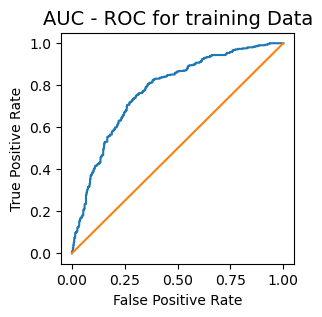

In [39]:
plt.figure(figsize=(3,3))
plt.title('AUC - ROC for training Data',fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.show()

In [40]:
## Predict for test data
yhat_test = clf.predict(X_test)

In [42]:
#yhat_test

In [43]:
te_cm = confusion_matrix(y_test,yhat_test)
te_cm

array([[77, 34],
       [37, 72]], dtype=int64)

In [44]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       111
           1       0.68      0.66      0.67       109

    accuracy                           0.68       220
   macro avg       0.68      0.68      0.68       220
weighted avg       0.68      0.68      0.68       220



In [48]:
proba_ttrue = clf.predict_proba(X_test)[:,1]

In [49]:
fpr_t,tpr_t,threshold_t = roc_curve(y_test,proba_ttrue)
auc_t = roc_auc_score(y_test,yhat_test)
auc_t

0.677122076204645

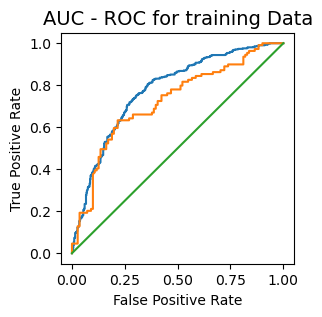

In [50]:
plt.figure(figsize=(3,3))
plt.title('AUC - ROC for training Data',fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot(fpr_t,tpr_t)
plt.plot([0,1],[0,1])
plt.show()